# Employee Promotion Prediction


## Description

## Background & Context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

You as a data scientist at JMD company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the employee has a higher probability of getting a promotion
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the company

## Data Dictionary:

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion


### Importing Libraries

In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Loading Data

In [6]:
prediction = pd.read_csv("employee_promotion.csv")

<IPython.core.display.Javascript object>

In [8]:
# Checking the number of rows and columns in the data
prediction.shape

(54808, 13)

<IPython.core.display.Javascript object>

* The dataset has 54808 rows and 13 columns 

### Data Overview

In [9]:
# let's create a copy of the data
data = prediction.copy()

<IPython.core.display.Javascript object>

In [10]:
# let's view the first 5 rows of the data
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


<IPython.core.display.Javascript object>

In [11]:
# let's view the last 5 rows of the data
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


<IPython.core.display.Javascript object>

In [12]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


<IPython.core.display.Javascript object>

* 5 columns are of object type rest all are numerical.

In [13]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [14]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

employee_id            0.000
department             0.000
region                 0.000
education              4.400
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   7.520
length_of_service      0.000
awards_won             0.000
avg_training_score     4.670
is_promoted            0.000
dtype: float64

<IPython.core.display.Javascript object>

- Education_Level has 4.4% missing values
- previous_year_rating has 7.52% missing values
- average_training_score has 4.67% missing values

In [15]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

#### Observations:
* employee_id: It is a unique identifier tht can be dropped for analysis
* no_of_rtrainings: Average trainings is 1.25, years, min is 1 and max is 10
* age: Average employee age is 34 years, min is 20 and max is 60
* previous_year_rating: The rating last year in average is 3.3 with a minimum of 1 and a maximum of 5
* length_of_service: On average the length of service is 5.8 years with a minimum of 1 year and a maximum of 37
* awards_won: On average JMD awards .02 awards with a minimum of 0 and a maximum of 1 
* avg_training_score: THe average training score is 63 with a minimum score of 39 to 99
* is_promoted: This is our dependent variable

In [16]:
data.describe(include=["object"]).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


<IPython.core.display.Javascript object>

In [17]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
reg

<IPython.core.display.Javascript object>

**Observations**
* There are 9 distinct departments at JMD.
* Most of the employees are male at an approximate ration 2.5 to 1
* Most employees were recruited from other channels.
* Most employees have a bachelors degree.
* There are 34 different regions where employees work
* There are some missing values in previous_year_rating, education and average_training_score. Some of the missing values might be due to new hires

## Data Pre-processing

In [18]:
# employee_id consists of uniques ID employees and hence will not add value to the modeling
data.drop(["employee_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [19]:
## Encoding not promoted and promoted employees to 0 and 1 respectively, for analysis.
data["is_promoted"].replace("Employee", 0, inplace=True)
data["is_promoted"].replace("Promoted Employee", 1, inplace=True)

<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on no_of_trainings

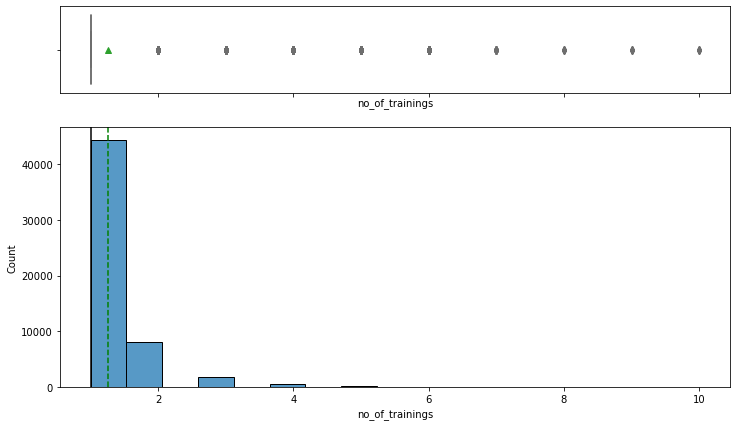

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "no_of_trainings")

* The distribution of number of trainings is skewed to the right with most employees having less than 2 trainings
* From the boxplot, we can see that there are a several outliers.

### Observations on age

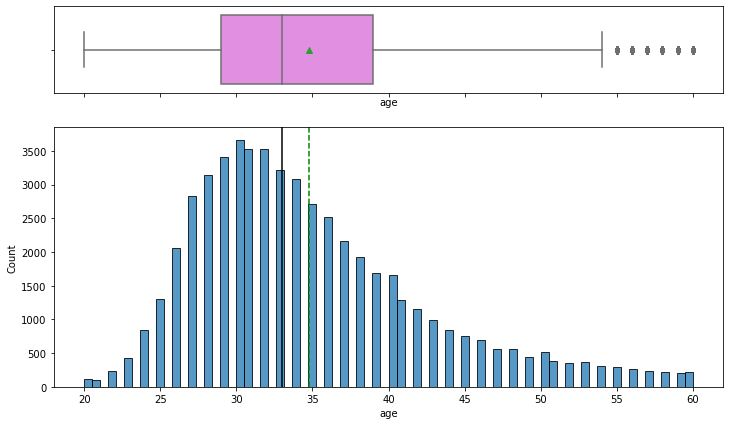

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "age")

* The distribution of age is slightly skewed to the right with an average of 35 years old
* From the boxplot, we can see that there are outliers to the older side of age

### Observations on previous_year_rating

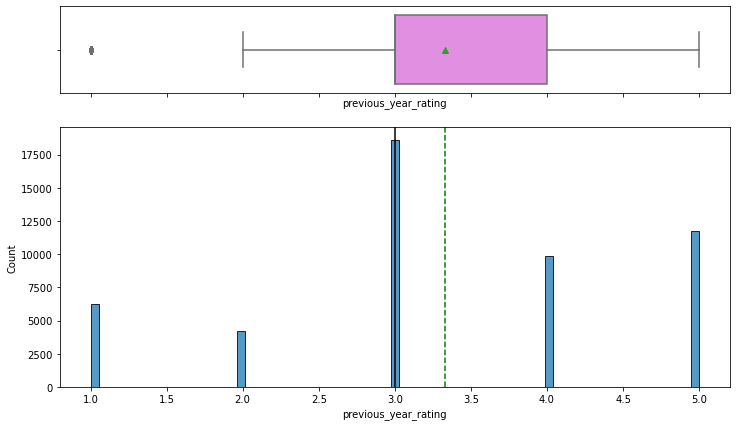

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "previous_year_rating")

* This is a 5 odd distributed curve, most values are centered. However we can see that there is at least 10% of the population that is under-performing (score = 1) and about 20% is over-performing (score=5)

### Observations on length_of_service

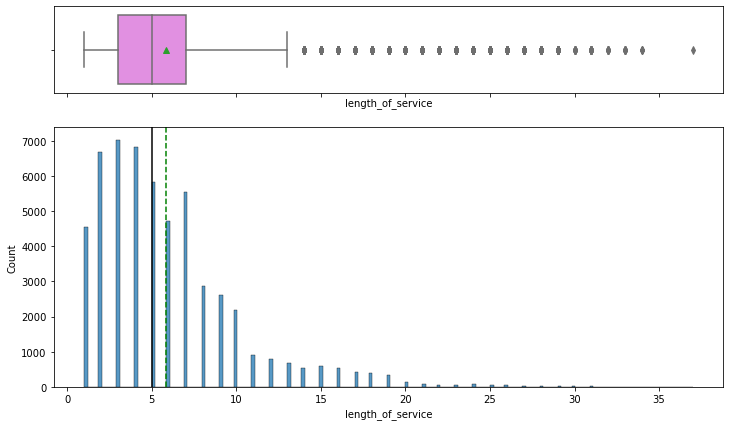

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "length_of_service")

* The distribution of service is skewed to the right with several outlies passed 12 years of service
* Most of the employees have less than 7 years of service

### Observations on awards_won

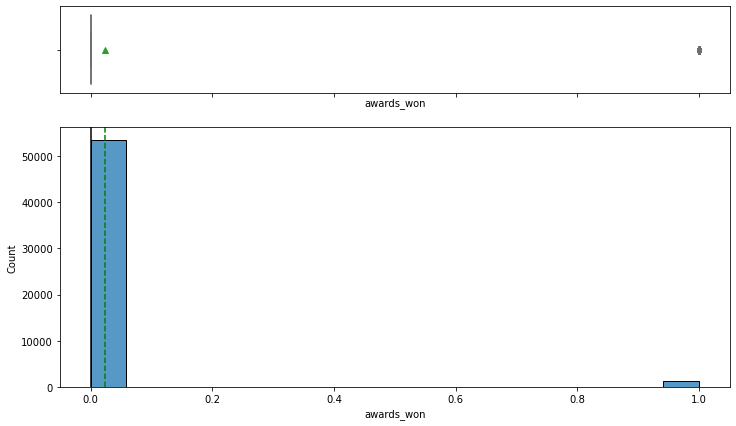

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "awards_won")

* Less than 1-2% have won an award

### Observations on avg_training_score

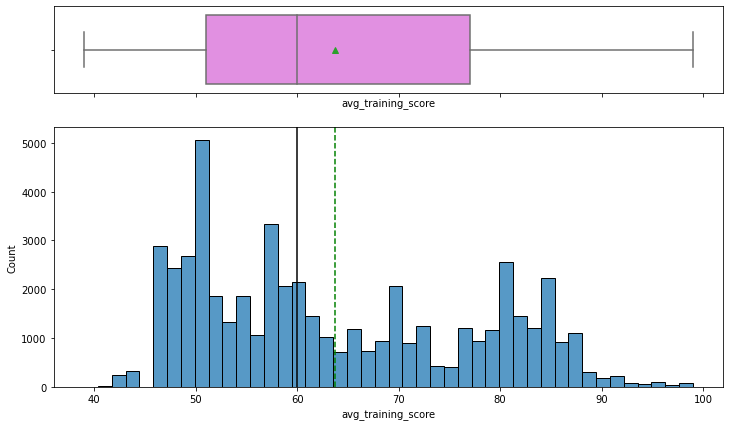

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "avg_training_score")

* The data is concentrated betwee 45 and 85 score

In [38]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Department

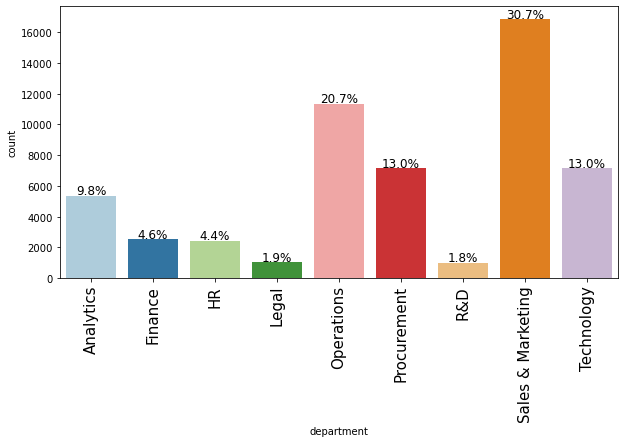

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "department")

* The majority of employees belong to Sales & Marketing, Operations, Procurement and Technology.

### Observations on region

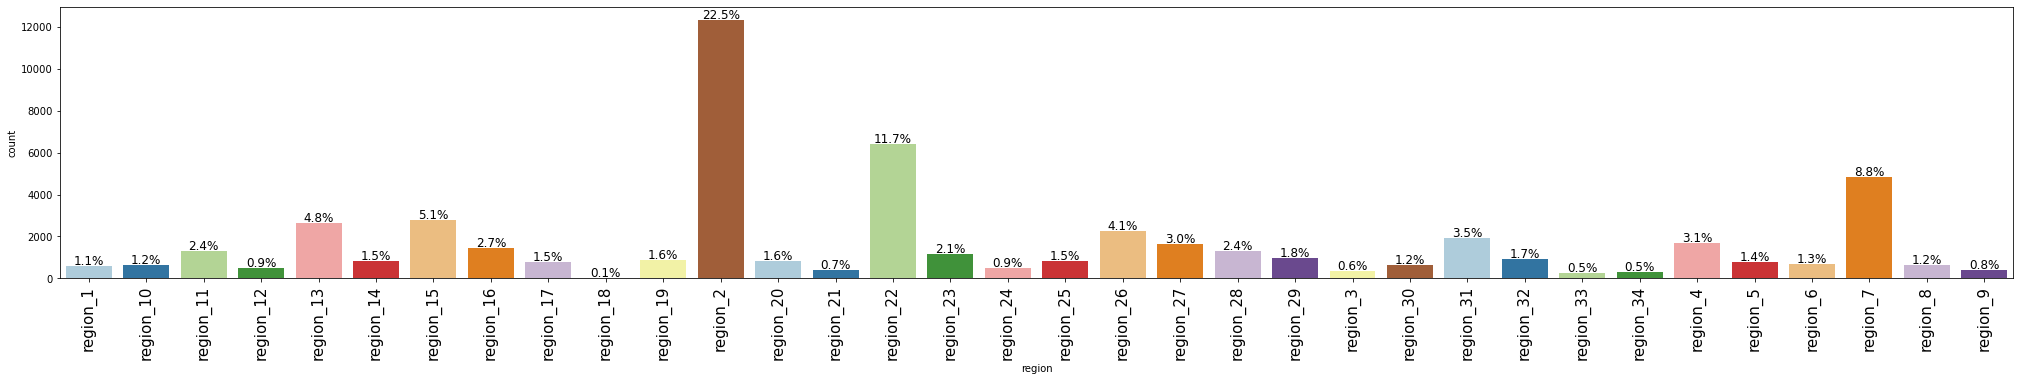

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "region")

* Region 2, 7 and 22 are highly populated

### Observations on Education

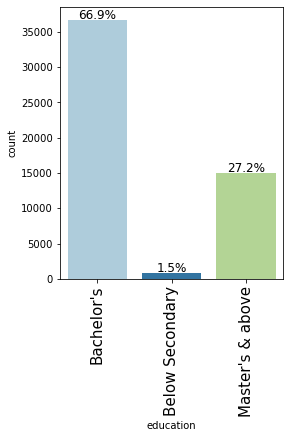

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "education")

* Most employees have a bachelors degree with 66%

### Observations on Gender

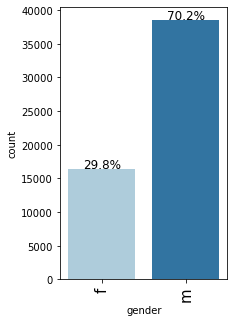

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(data, "gender")

* There are 70% male employees in JMD

### Observations on Awards won

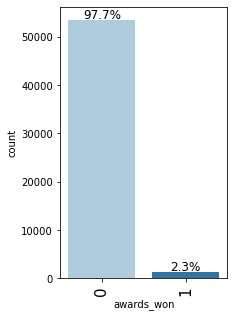

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data, "awards_won")

* The vast majority of employees have not won an award

### Observations on Recruitment channel

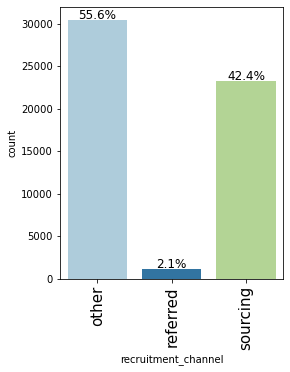

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(data, "recruitment_channel")

* 55% of employees were recruited through "other" channels and 42% through sourcing


### Observations on Length of service

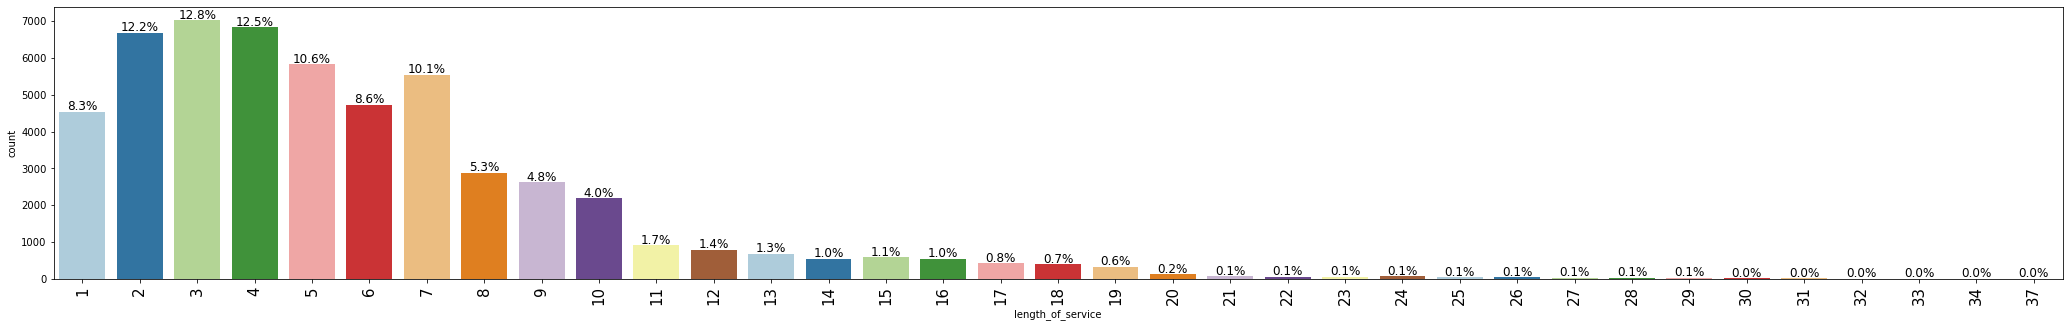

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(data, "length_of_service")

* As mentioned high percent of the population has less than 7 years of service

In [49]:
### Observations on promotion

<IPython.core.display.Javascript object>

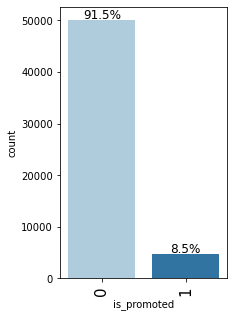

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(data, "is_promoted")

* Only 8% of the employees have received a promotion
* This indicates an imbalance in the data.

## Bivariate Analysis

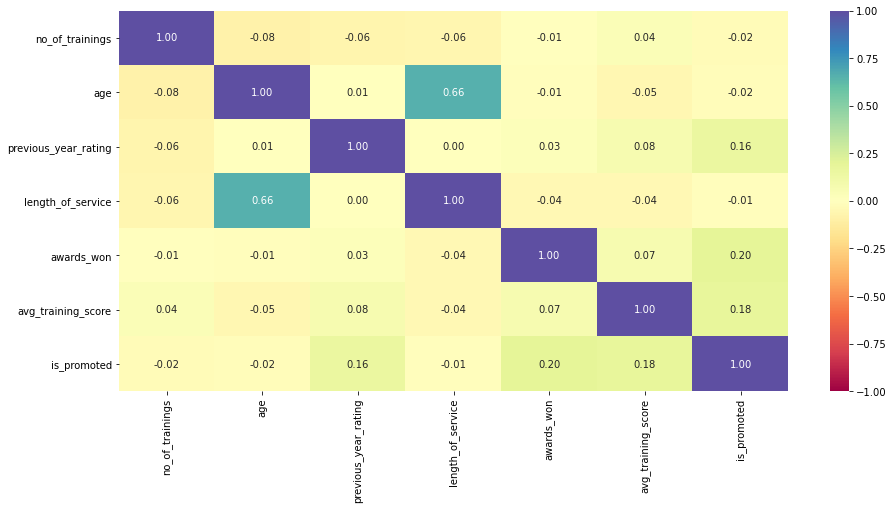

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Length of service and age show a bit of correlation.
* All other features seem to be independent

In [51]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Promoted vs Gender

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


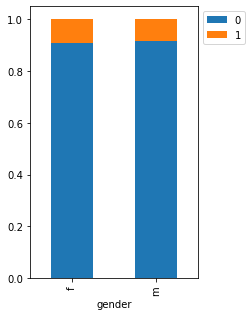

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "gender", "is_promoted")

* There's no difference when female/male(s) are being promoted

### Promoted vs Education

education    Bachelor's  Below Secondary  Master's & above    All
is_promoted                                                      
All               36669              805             14925  52399
0                 33661              738             13454  47853
1                  3008               67              1471   4546
------------------------------------------------------------------------------------------------------------------------


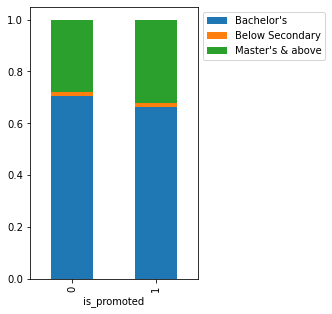

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "is_promoted", "education")

* Employees with a masters degree or above seem to have a higher edge when it comes to promotion.

### Promoted vs Department

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


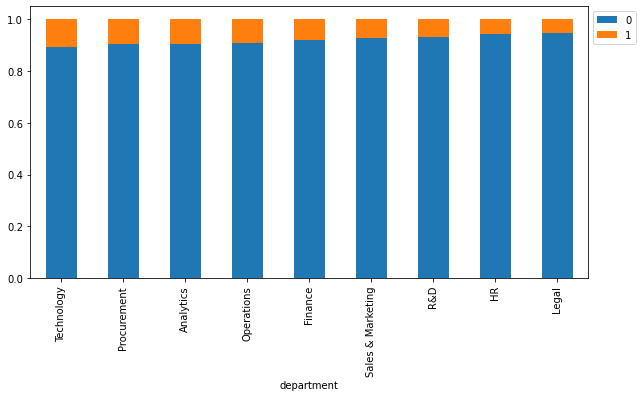

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "department", "is_promoted")

* Technology, Procurement, Analytics and Operations employees seem to be promoted more than employees in other departments

### Promoted vs awards won

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


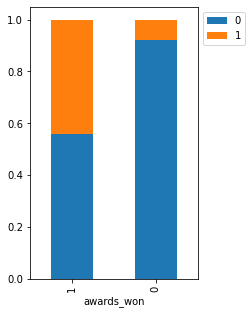

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "awards_won", "is_promoted")

* It is evient that if you have won an award at JMD there is a high likelihood of promotion

### Promoted vs Length of service

is_promoted            0     1    All
length_of_service                    
All                50140  4668  54808
3                   6424   609   7033
4                   6238   598   6836
2                   6089   595   6684
5                   5357   475   5832
7                   5087   464   5551
6                   4333   401   4734
1                   4170   377   4547
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
15                   550    43    593
16                   507    41    548
19                   297    32    329
14                   520    29    549
17                   406    26    432
18                   367    25    392
20                   118    10    128
23                    58     7     65
22                    55     6     61
21                    74     4     78
29          

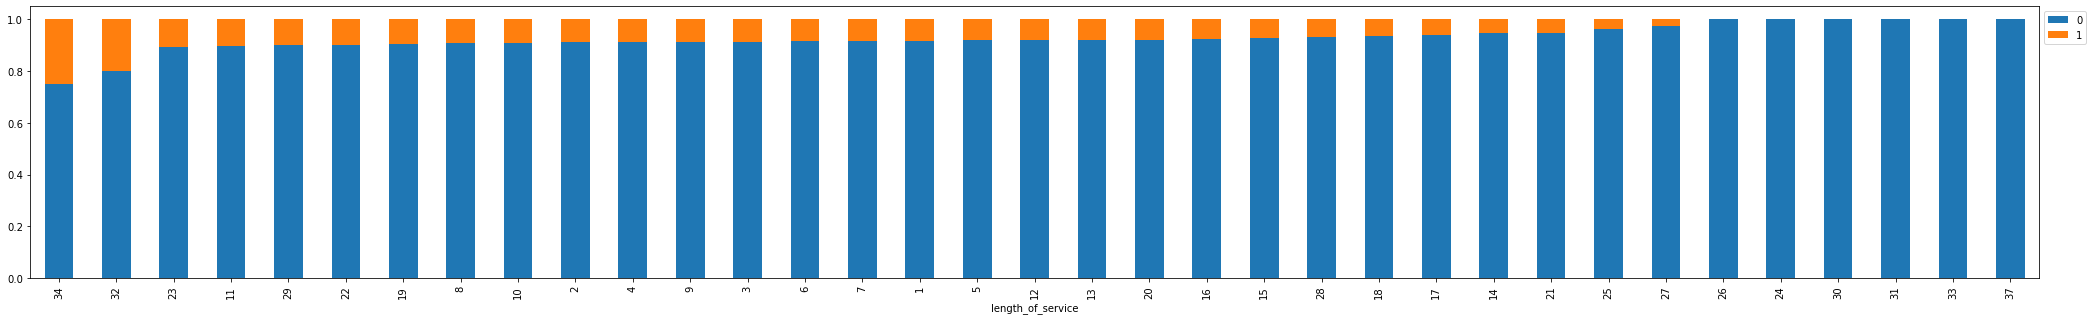

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(data, "length_of_service", "is_promoted")

* The higher the years of service the more likely that the employee will be promoted

### Promoted vs Region

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

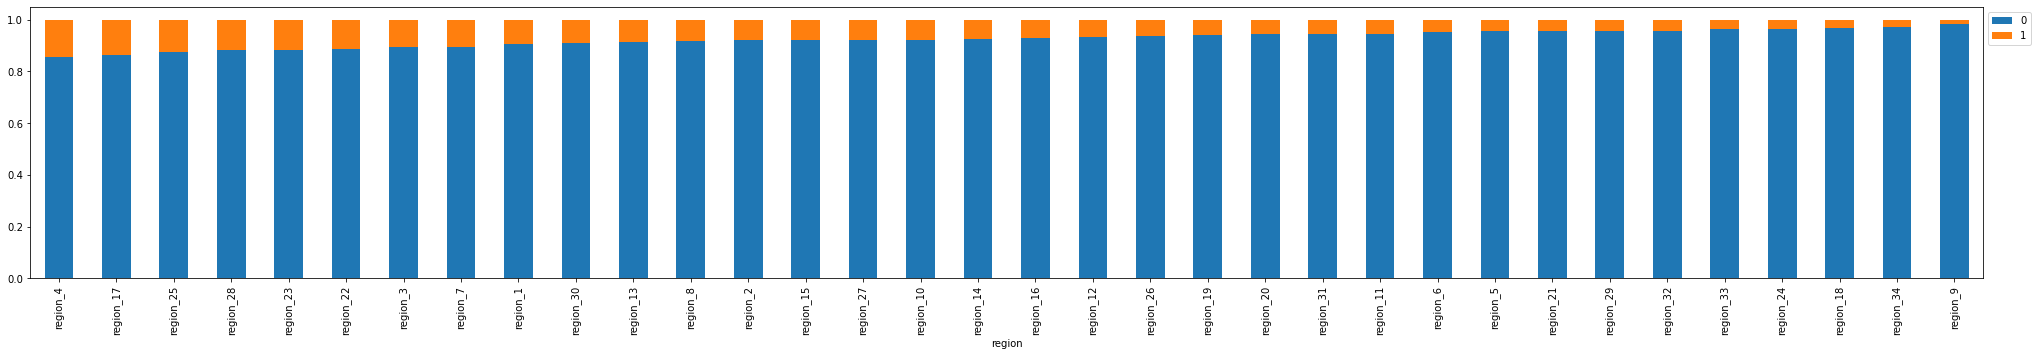

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "region", "is_promoted")

* There are several regions where promotion is higher

### Promoted vs Previous year rating

is_promoted               0     1    All
previous_year_rating                    
All                   46355  4329  50684
5.0                    9820  1921  11741
3.0                   17263  1355  18618
4.0                    9093   784   9877
2.0                    4044   181   4225
1.0                    6135    88   6223
------------------------------------------------------------------------------------------------------------------------


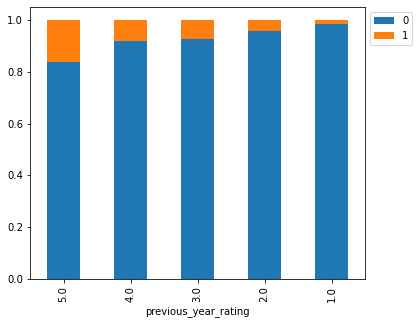

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "previous_year_rating", "is_promoted")

* As expected the higher the rating from last year the better opportunites for promotion

In [62]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Promoted vs Age

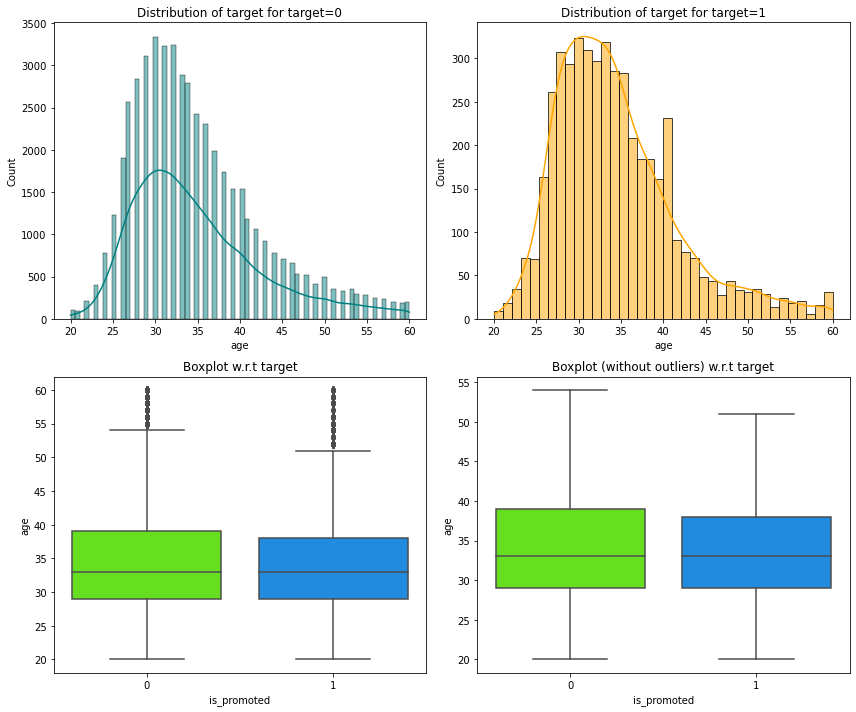

<IPython.core.display.Javascript object>

In [63]:
distribution_plot_wrt_target(data, "age", "is_promoted")

* There's a slight difference in age for employees not promoted vs promoted.

### Promoted vs Length of service

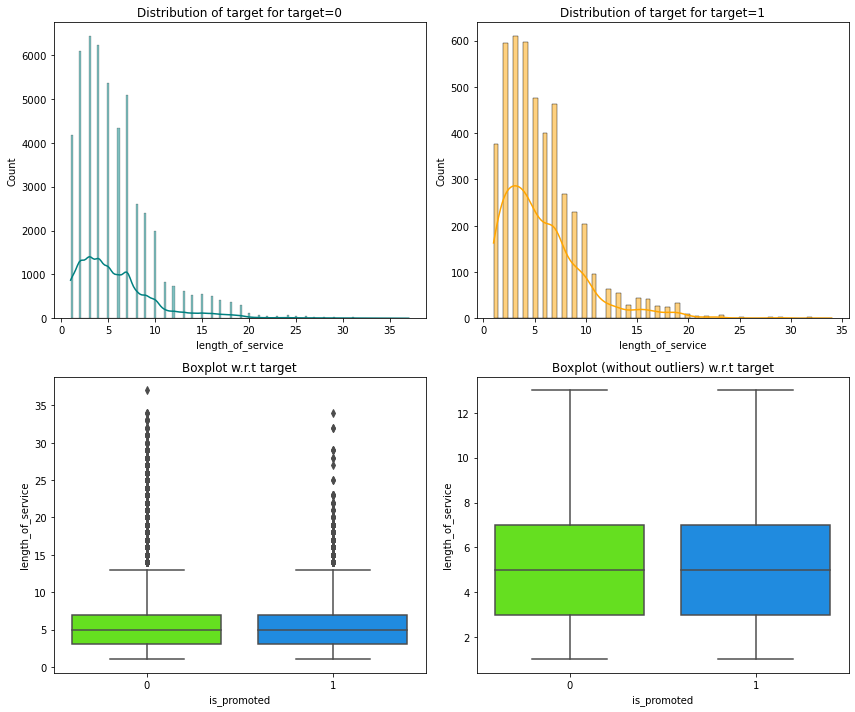

<IPython.core.display.Javascript object>

In [65]:
distribution_plot_wrt_target(data, "length_of_service", "is_promoted")

* Tenure has little impact on promotion.

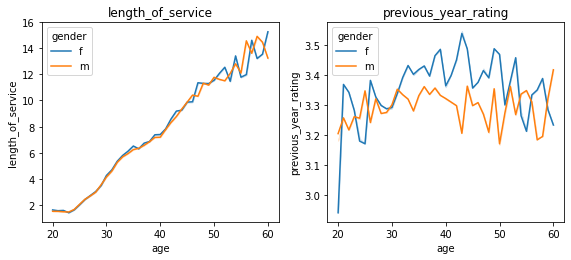

<IPython.core.display.Javascript object>

In [68]:
cols = data[
    ["length_of_service", "previous_year_rating",]
].columns.tolist()
plt.figure(figsize=(12, 10))
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.lineplot(data["age"], data[variable], hue=data["gender"], ci=0)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* It seems that age and gender follow very closely when it comes to years of service.
* From age 30-50 females seem to do better during previous year rating


### Percentage of outliers, in each column of the data, using IQR.

In [69]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [70]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

no_of_trainings        19.030
age                     2.618
previous_year_rating   11.354
length_of_service       6.366
awards_won              2.317
avg_training_score      0.000
is_promoted             8.517
dtype: float64

<IPython.core.display.Javascript object>

* There are some high percentage of outliers when it comes to no_of_trainings and previous_year_rating. The outliers are typical and will not be treated for this example

### Missing value imputation
- We will impute missing values in all 3 columns (education, previous_year_rating and avg_training_score using mode)

In [71]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [72]:
data1.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

<IPython.core.display.Javascript object>

In [73]:
imputer = SimpleImputer(strategy="most_frequent")

<IPython.core.display.Javascript object>

In [74]:
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]

<IPython.core.display.Javascript object>

In [75]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 11) (10962, 11) (10962, 11)


<IPython.core.display.Javascript object>

In [77]:
reqd_col_for_impute = ["education", "previous_year_rating", "avg_training_score"]

<IPython.core.display.Javascript object>

In [78]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [79]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


<IPython.core.display.Javascript object>

* All missing values have been treated.

In [80]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Sales & Marketing    9989
Operations           6746
Technology           4383
Procurement          4330
Analytics            3173
Finance              1570
HR                   1482
R&D                   613
Legal                 598
Name: department, dtype: int64
******************************
region_2     7351
region_22    3867
region_7     2973
region_15    1706
region_13    1584
region_26    1344
region_31    1132
region_4      987
region_27     983
region_16     893
region_11     799
region_28     780
region_23     688
region_29     601
region_32     577
region_19     533
region_20     525
region_14     510
region_17     498
region_25     480
region_5      442
region_8      411
region_6      408
region_10     407
region_30     396
region_1      368
region_12     312
region_24     306
region_9      242
region_21     230
region_3      212
region_34     167
region_33     155
region_18      17
Name: region, dtype: int64
******************************
Bachelor's          23562
Master's

<IPython.core.display.Javascript object>

In [81]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Sales & Marketing    3454
Operations           2315
Procurement          1392
Technology           1364
Analytics            1072
Finance               485
HR                    456
Legal                 227
R&D                   197
Name: department, dtype: int64
******************************
region_2     2478
region_22    1262
region_7      915
region_15     557
region_13     533
region_26     466
region_31     431
region_27     358
region_4      351
region_16     288
region_11     262
region_28     252
region_23     248
region_32     201
region_29     201
region_19     176
region_20     171
region_14     167
region_25     156
region_5      154
region_17     149
region_6      138
region_1      133
region_30     132
region_8      126
region_10     119
region_24     106
region_21      93
region_12      86
region_9       83
region_3       62
region_33      60
region_34      44
region_18       4
Name: region, dtype: int64
******************************
Bachelor's          7744
Master's 

<IPython.core.display.Javascript object>

In [82]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Sales & Marketing    9989
Operations           6746
Technology           4383
Procurement          4330
Analytics            3173
Finance              1570
HR                   1482
R&D                   613
Legal                 598
Name: department, dtype: int64
******************************
region_2     7351
region_22    3867
region_7     2973
region_15    1706
region_13    1584
region_26    1344
region_31    1132
region_4      987
region_27     983
region_16     893
region_11     799
region_28     780
region_23     688
region_29     601
region_32     577
region_19     533
region_20     525
region_14     510
region_17     498
region_25     480
region_5      442
region_8      411
region_6      408
region_10     407
region_30     396
region_1      368
region_12     312
region_24     306
region_9      242
region_21     230
region_3      212
region_34     167
region_33     155
region_18      17
Name: region, dtype: int64
******************************
Bachelor's          23562
Master's

<IPython.core.display.Javascript object>

### Encoding categorical variables

In [83]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 52) (10962, 52) (10962, 52)


<IPython.core.display.Javascript object>

* After encoding there are 52 columns.

In [84]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
24986,2,34,3.000,4,0,85.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
42259,1,35,3.000,10,0,65.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
51748,2,28,4.000,3,0,50.000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48031,1,38,1.000,9,0,51.000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
36827,1,39,5.000,12,0,88.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

## Building the model

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an employee will be promoted and the employee is not promoted
2. Predicting an employee will not be promoted and the employee is promoted

### Which case is more important? 
* In my opinion both are valuable pieces of information but it would be interesting to understand the Recall of the problem when the employee is not expected to be promoted but it is promoted

### How to reduce this loss i.e need to reduce False Negatives?
* Use `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1).

**Functions to calculate different metrics and confusion matrix**

In [85]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [86]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Model with original data

In [87]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 11.214285714285714
Bagging: 33.357142857142854
Random forest: 25.178571428571427
GBM: 28.92857142857143
Adaboost: 16.392857142857142
Xgboost: 33.0
dtree: 38.857142857142854

Validation Performance:

Logistic regression: 0.11670235546038545
Bagging: 0.33190578158458245
Random forest: 0.25910064239828695
GBM: 0.2826552462526767
Adaboost: 0.16059957173447537
Xgboost: 0.33190578158458245
dtree: 0.3854389721627409


<IPython.core.display.Javascript object>

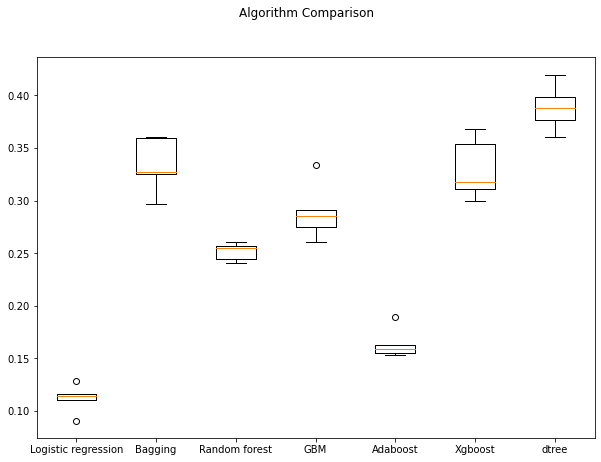

<IPython.core.display.Javascript object>

In [89]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Performance comparison
- dtree has the best performance followed by bagging


## Models with Oversampled data

In [90]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2800
Before Oversampling, counts of label 'No': 30084 

After Oversampling, counts of label 'Yes': 30084
After Oversampling, counts of label 'No': 30084 

After Oversampling, the shape of train_X: (60168, 52)
After Oversampling, the shape of train_y: (60168,) 



<IPython.core.display.Javascript object>

In [91]:
%%time
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold, n_jobs=-1
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 83.07407160209195
Bagging: 93.46164921905664
Random forest: 93.90373385779299
GBM: 85.76986658368664
Adaboost: 87.30554541388052
Xgboost: 92.10876585490048
dtree: 93.99348731342756

Validation Performance:

Logistic regression: 0.2955032119914347
Bagging: 0.31156316916488225
Random forest: 0.29229122055674517
GBM: 0.37794432548179874
Adaboost: 0.3222698072805139
Xgboost: 0.3747323340471092
dtree: 0.3747323340471092
CPU times: user 40.8 s, sys: 5.06 s, total: 45.8 s
Wall time: 51 s


<IPython.core.display.Javascript object>

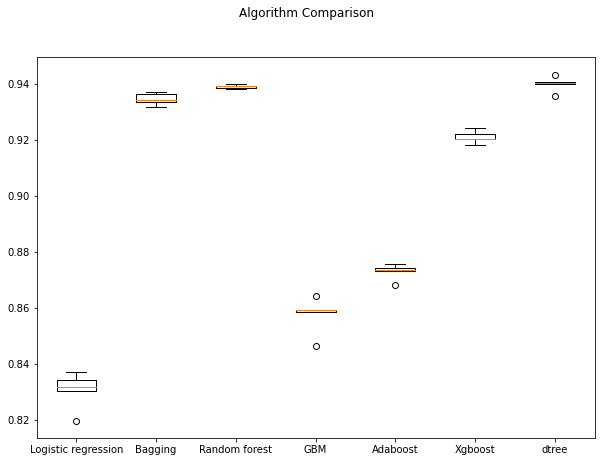

<IPython.core.display.Javascript object>

In [93]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

### Performance comparison
- Random forest has the best performance followed by bagging
- Performance of all models in the validation set is poor

## Models with Undersampled data

In [94]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [95]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2800
Before Under Sampling, counts of label 'No': 30084 

After Under Sampling, counts of label 'Yes': 2800
After Under Sampling, counts of label 'No': 2800 

After Under Sampling, the shape of train_X: (5600, 52)
After Under Sampling, the shape of train_y: (5600,) 



<IPython.core.display.Javascript object>

In [96]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1, max_iter=200)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 67.35714285714288
Bagging: 62.67857142857143
Random forest: 67.14285714285715
GBM: 61.10714285714286
Adaboost: 66.25
Xgboost: 64.75000000000001
dtree: 65.53571428571429

Validation Performance:

Logistic regression: 0.6852248394004282
Bagging: 0.6124197002141327
Random forest: 0.6702355460385439
GBM: 0.6231263383297645
Adaboost: 0.6702355460385439
Xgboost: 0.6541755888650964
dtree: 0.6413276231263383


<IPython.core.display.Javascript object>

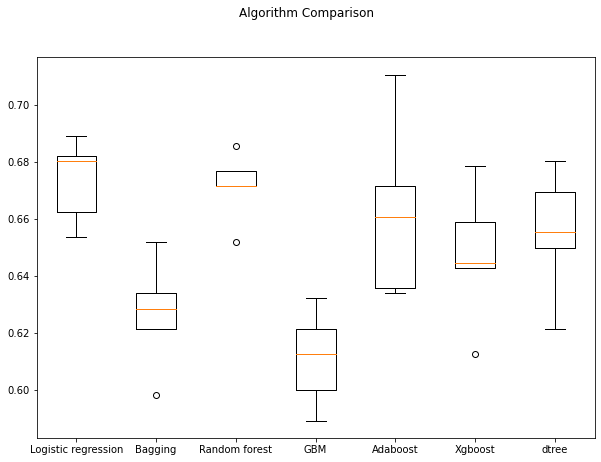

<IPython.core.display.Javascript object>

In [97]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

### Performance comparison
- Logistic Regression & random forest are performing equally well as per the validation performance
- It would seem that undersampling is not overfitting the data like in the oversampling case

## Which models should be tuned?
- There is a mix and match of models and none are consistent. There is dtree, bagging, random forest and logistic regression
- Tune these 4 models (adding an extra one since the results are ambiguous).
- We will tune these 4 models using undersampled data.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data

## Tuning dtree

### Tuning with Undersampled data

In [121]:
%%time 

# defining model
Model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 2, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 8} with CV score=0.5921428571428571:
CPU times: user 420 ms, sys: 170 ms, total: 590 ms
Wall time: 1.77 s


<IPython.core.display.Javascript object>

In [122]:
%%time 

# defining model
Model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 2, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 8} with CV score=0.5921428571428571:
CPU times: user 266 ms, sys: 35.5 ms, total: 302 ms
Wall time: 513 ms


<IPython.core.display.Javascript object>

In [123]:
%%time
tuned_dtree1 = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=2,
    min_impurity_decrease=0.001,
    max_leaf_nodes=10,
    max_depth=8,
)
tuned_dtree1.fit(X_train_un, y_train_un)

CPU times: user 9.2 ms, sys: 864 µs, total: 10.1 ms
Wall time: 9.08 ms


DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       random_state=1)

<IPython.core.display.Javascript object>

In [124]:
# Checking model's performance on train set
dtree1_train = model_performance_classification_sklearn(
    tuned_dtree1, X_train_un, y_train_un
)
dtree1_train

,Accuracy,Recall,Precision,F1
0,0.688,0.591,0.734,0.655


<IPython.core.display.Javascript object>

In [125]:
# Checking model's performance on validation set
dtree1_val = model_performance_classification_sklearn(tuned_dtree1, X_val, y_val)
dtree1_val

,Accuracy,Recall,Precision,F1
0,0.770,0.596,0.207,0.307


<IPython.core.display.Javascript object>

### Tuning with Original data

In [126]:
%%time 

# defining model
Model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 2, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 8} with CV score=0.15035714285714286:
CPU times: user 642 ms, sys: 355 ms, total: 997 ms
Wall time: 3.59 s


<IPython.core.display.Javascript object>

In [127]:
tuned_dtree2 = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=2,
    min_impurity_decrease=0.001,
    max_leaf_nodes=10,
    max_depth=8,
)
tuned_dtree2.fit(X_train_un, y_train_un)
tuned_dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       random_state=1)

<IPython.core.display.Javascript object>

In [128]:
# Checking model's performance on training set
dtree2_train = model_performance_classification_sklearn(tuned_dtree2, X_train, y_train)
dtree2_train

,Accuracy,Recall,Precision,F1
0,0.925,0.141,0.861,0.242


<IPython.core.display.Javascript object>

In [129]:
# Checking model's performance on validation set
dtree2_val = model_performance_classification_sklearn(tuned_dtree2, X_val, y_val)
dtree2_val

,Accuracy,Recall,Precision,F1
0,0.924,0.136,0.836,0.234


<IPython.core.display.Javascript object>

## Tuning Logistic Regression

### Tuning with Undersampled data

In [156]:
%%time

# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25], 'solver':['newton-cg', 'lbfgs', 'liblinear']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.009} with CV score=0.6875:
CPU times: user 311 ms, sys: 160 ms, total: 472 ms
Wall time: 3.04 s


<IPython.core.display.Javascript object>

In [159]:
%%time

# defining model
Model = LogisticRegression(solver="liblinear",random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25], 'solver': ['liblinear']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.009} with CV score=0.6875:
CPU times: user 109 ms, sys: 16.8 ms, total: 126 ms
Wall time: 254 ms


<IPython.core.display.Javascript object>

In [160]:
tuned_log1 = LogisticRegression(
    random_state=1,
    penalty='l2',
    C=0.009,
    solver='liblinear'
 )

tuned_log1.fit(X_train_un, y_train_un)

LogisticRegression(C=0.009, random_state=1, solver='liblinear')

<IPython.core.display.Javascript object>

In [161]:
# Checking model's performance on training set
log1_train = model_performance_classification_sklearn(
    tuned_log1, X_train_un, y_train_un
)
log1_train

,Accuracy,Recall,Precision,F1
0,0.656,0.687,0.647,0.666


<IPython.core.display.Javascript object>

In [162]:
# Checking model's performance on validation set
log1_val = model_performance_classification_sklearn(tuned_log1, X_val, y_val)
log1_val

,Accuracy,Recall,Precision,F1
0,0.639,0.678,0.148,0.242


<IPython.core.display.Javascript object>

### Tuning with Original data

In [163]:
%%time

# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'solver': ['liblinear']

}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'solver': 'liblinear', 'penalty': 'l2', 'C': 25} with CV score=0.26357142857142857:
CPU times: user 296 ms, sys: 62.7 ms, total: 359 ms
Wall time: 1.57 s


<IPython.core.display.Javascript object>

In [166]:
tuned_log2 = LogisticRegression(
    random_state=1,
    penalty='l2',
    C=25,
    solver='liblinear'
    
)
tuned_log2.fit(X_train, y_train)

LogisticRegression(C=25, random_state=1, solver='liblinear')

<IPython.core.display.Javascript object>

In [168]:
# Checking model's performance on validation set
log2_val = model_performance_classification_sklearn(tuned_log2, X_val, y_val)
log2_val

,Accuracy,Recall,Precision,F1
0,0.937,0.283,0.943,0.435


<IPython.core.display.Javascript object>

In [169]:
# Checking model's performance on training set
log2_train = model_performance_classification_sklearn(tuned_log2, X_train, y_train)
log2_train

,Accuracy,Recall,Precision,F1
0,0.937,0.269,0.954,0.420


<IPython.core.display.Javascript object>

## Tuning Bagging

### Tuning with Undersampled Data

In [179]:
%%time 

#Creating pipeline
Model = BaggingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators' : [100, 300, 500, 800, 1200],
#max_depth = [5, 10, 15, 25, 30]
'max_samples' : [5, 10, 25, 50, 100],
'max_features' : [1, 2, 5, 10, 13],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 500, 'max_samples': 5, 'max_features': 1} with CV score=0.7949999999999999:
CPU times: user 1.3 s, sys: 249 ms, total: 1.55 s
Wall time: 34.1 s


<IPython.core.display.Javascript object>

In [180]:
tuned_bag1 = BaggingClassifier(
    random_state=1,
    n_estimators=500,
    max_samples=5,
    max_features=1,

)
tuned_bag1.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=1, max_samples=5, n_estimators=500,
                  random_state=1)

<IPython.core.display.Javascript object>

In [181]:
# Checking model's performance on training set
bag1_train = model_performance_classification_sklearn(
    tuned_bag1, X_train_un, y_train_un
)
bag1_train

,Accuracy,Recall,Precision,F1
0,0.548,0.840,0.530,0.650


<IPython.core.display.Javascript object>

In [182]:
# Checking model's performance on validation set
bag1_val = model_performance_classification_sklearn(tuned_bag1, X_val, y_val)
bag1_val

,Accuracy,Recall,Precision,F1
0,0.321,0.849,0.098,0.176


<IPython.core.display.Javascript object>

### Tuning with Original data

In [205]:
%%time 

#defining model
Model = BaggingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators' : [100, 300, 500, 800, 1200],
#max_depth = [5, 10, 15, 25, 30]
'max_samples' : [5, 10, 25, 50, 100],
'max_features' : [1, 2, 5, 10, 13],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 1200, 'max_samples': 100, 'max_features': 5} with CV score=0.0:
CPU times: user 3.28 s, sys: 568 ms, total: 3.85 s
Wall time: 1min 18s


<IPython.core.display.Javascript object>

In [200]:
tuned_bag2 = BaggingClassifier(

    random_state=1,
    n_estimators=1200,
    max_samples=100,
    max_features=5,


)
tuned_bag2.fit(X_train, y_train)

BaggingClassifier(max_features=5, max_samples=100, n_estimators=1200,
                  random_state=1)

<IPython.core.display.Javascript object>

In [204]:
# Checking model's performance on training set
bag2_train = model_performance_classification_sklearn(tuned_bag2, X_train, y_train)
bag2_train

,Accuracy,Recall,Precision,F1
0,0.915,0.000,0.000,0.000


<IPython.core.display.Javascript object>

In [203]:
# Checking model's performance on validation set
bag2_val = model_performance_classification_sklearn(tuned_bag2, X_val, y_val)
bag2_val

,Accuracy,Recall,Precision,F1
0,0.915,0.000,0.000,0.000


<IPython.core.display.Javascript object>

## Tuning Random Forest

### Tuning with Undersampled Data

In [206]:
%%time 

#Creating pipeline
Model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
   'n_estimators' : [100, 300, 500, 800, 1200],
'max_depth' : [5, 10, 15, 25, 30],
'min_samples_split' :[2, 5, 10, 15, 100],
'min_samples_leaf' : [1, 2, 5, 10]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30} with CV score=0.6667857142857143:
CPU times: user 1.28 s, sys: 483 ms, total: 1.76 s
Wall time: 1min 14s


<IPython.core.display.Javascript object>

In [207]:
tuned_forest1 = RandomForestClassifier(
    random_state=1,
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=30

)
tuned_forest1.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       random_state=1)

<IPython.core.display.Javascript object>

In [212]:
# Checking model's performance on training set
forest1_train = model_performance_classification_sklearn(
    tuned_forest1, X_train_un, y_train_un
)
forest1_train

,Accuracy,Recall,Precision,F1
0,0.891,0.860,0.917,0.887


<IPython.core.display.Javascript object>

In [213]:
# Checking model's performance on validation set
forest1_val = model_performance_classification_sklearn(tuned_forest1, X_val, y_val)
forest1_val

,Accuracy,Recall,Precision,F1
0,0.764,0.669,0.215,0.326


<IPython.core.display.Javascript object>

### Tuning with Original data

In [214]:
%%time 

#defining model
Model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
   'n_estimators' : [100, 300, 500, 800, 1200],
'max_depth' : [5, 10, 15, 25, 30],
'min_samples_split' :[2, 5, 10, 15, 100],
'min_samples_leaf' : [1, 2, 5, 10]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30} with CV score=0.24857142857142858:
CPU times: user 7.22 s, sys: 1.4 s, total: 8.62 s
Wall time: 6min 8s


<IPython.core.display.Javascript object>

In [215]:
tuned_forest2 = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=30

)
tuned_forest2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [216]:
# Checking model's performance on training set
forest2_train = model_performance_classification_sklearn(
    tuned_forest2, X_train_un, y_train_un
)
forest2_train

,Accuracy,Recall,Precision,F1
0,0.997,0.994,1.000,0.997


<IPython.core.display.Javascript object>

In [217]:
# Checking model's performance on validation set
forest2_val = model_performance_classification_sklearn(tuned_forest2, X_val, y_val)
forest2_val

,Accuracy,Recall,Precision,F1
0,0.750,0.677,0.206,0.315


<IPython.core.display.Javascript object>

## Model Performance comparison

In [218]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train.T,
        dtree2_train.T,
        log1_train.T,
        log2_train.T,
        bag1_train.T,
        bag2_train.T,
        forest1_train.T,
        forest2_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree trained with Undersampled data",
    "Decision Tree trained with Original data",
    "Logistic Regression trained with Undersampled data",
    "Logistic Regression trained with Original data",
    "Bagging trained with Undersampled data",
    "Bagging trained with Original data",
    "Random forest trained with Undersampled data",
    "Random forest trained with Original data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree trained with Undersampled data,Decision Tree trained with Original data,Logistic Regression trained with Undersampled data,Logistic Regression trained with Original data,Bagging trained with Undersampled data,Bagging trained with Original data,Random forest trained with Undersampled data,Random forest trained with Original data
Accuracy,0.688,0.925,0.656,0.937,0.548,0.915,0.891,0.997
Recall,0.591,0.141,0.687,0.269,0.840,0.000,0.860,0.994
Precision,0.734,0.861,0.647,0.954,0.530,0.000,0.917,1.000
F1,0.655,0.242,0.666,0.420,0.650,0.000,0.887,0.997


<IPython.core.display.Javascript object>

In [219]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [dtree1_val.T, dtree2_val.T, log1_val.T, log2_val.T, bag1_val.T, bag2_val.T, forest1_val.T, forest2_val.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree trained with Undersampled data",
    "Decision Tree trained with Original data",
    "Logistic Regression trained with Undersampled data",
    "Logistic Regression trained with Original data",
    "Bagging trained with Undersampled data",
    "Bagging trained with Original data",
    "Random forest trained with Undersampled data",
    "Random forest trained with Original data"]

print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Decision Tree trained with Undersampled data,Decision Tree trained with Original data,Logistic Regression trained with Undersampled data,Logistic Regression trained with Original data,Bagging trained with Undersampled data,Bagging trained with Original data,Random forest trained with Undersampled data,Random forest trained with Original data
Accuracy,0.770,0.924,0.639,0.937,0.321,0.915,0.764,0.750
Recall,0.596,0.136,0.678,0.283,0.849,0.000,0.669,0.677
Precision,0.207,0.836,0.148,0.943,0.098,0.000,0.215,0.206
F1,0.307,0.234,0.242,0.435,0.176,0.000,0.326,0.315


<IPython.core.display.Javascript object>

- Random Forest model trained with original data has generalised performance

In [220]:
# Let's check the performance on test set
forest2_test = model_performance_classification_sklearn(tuned_forest2, X_test, y_test)
forest2_test

,Accuracy,Recall,Precision,F1
0,0.751,0.669,0.205,0.314


<IPython.core.display.Javascript object>

- The model has given generalised performance on test set.

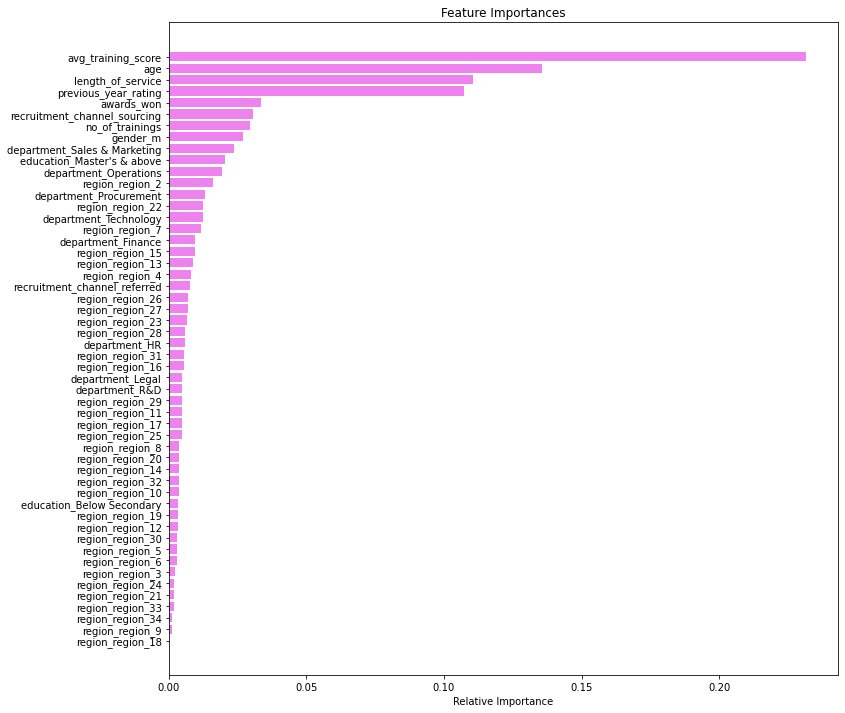

<IPython.core.display.Javascript object>

In [221]:
feature_names = X_train.columns
importances = tuned_forest2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Avg_training_score is the most important variable in predicting employee promotion followed by age, length_of_service, previous_year_rating and awards_won

## Final Pipelin/Model


In [237]:
# creating a list of numerical variables
numerical_features = [
     'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['department',
       'region', 'education', 'gender',
       'recruitment_channel']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



<IPython.core.display.Javascript object>

In [238]:
# Separating target variable and other variables
X = prediction.drop(columns="is_promoted")
Y = prediction["is_promoted"]

<IPython.core.display.Javascript object>

- pre-processing

In [239]:
# employee ID are unique values and will not add value to the modeling
X.drop(["employee_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

- Using the best model random forest

In [240]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 11) (16443, 11)


<IPython.core.display.Javascript object>

In [241]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "RF",RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=30

            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'awards_won',
                                                   'avg_training_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                    

<IPython.core.display.Javascript object>

## Insights and Business Recommendations

* We have been able to build a predictive model:

  - The company can utilize this model to predicte employee promotion
  - The analysis can be used to distinguish and effect factors that drive promotion
  - THe company can use the information to build "better" paths to promotion. Interestingly the random forest using original data gave us "age" as a factor that influences promotion, this should be investigated further in order to institue policies that promote fairness in all age groups
  

* Factors that help promotion - length_of_service, awards_won, previous_year_rating, age, avg_training_score

* awards_won. This factor influences prmotion positively, in other words if the employee has won an award it means that the likelihood of promotion is higher

* previous_year_rating. The factor influences promotion the higher the ranking the higher the chances of promotion

* length_of_service. This factor is somewhat intuitive as the longer the tenure of an employee the higher the chances for promotion

* There was an important factor potentially missing from the model which is department. The data analysis shows a correlation of people belonging to Technology to have a propensity of promotion over other groups
